## Makes plots and CSV files based on the [*LA City Open Data*](https://data.lacity.org/) Calls for Service data

### Specifically, these plots examine calls for service that might be occurring at a different level in recent months due to more people staying at home


#### THIS SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [66]:
# Let's make sure the months
# are in the calendar order for the plots
import calendar
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [67]:
# Read in CSVs
df19 = pd.read_csv('../data/cfs_2019.csv')
df20 = pd.read_csv('../data/cfs_2020.csv')

In [68]:
df20.tail()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
1473432,PD20110400002468,N Hollywood,1502.0,11/04/2020 12:00:00 AM,15:03:37,594SN,SUSP NOW
1473433,PD20110100002647,Outside,NaN,11/01/2020 12:00:00 AM,14:31:19,006,CODE 6
1473434,PD20110200003385,Southwest,341.0,11/02/2020 12:00:00 AM,20:19:18,594PSN,POSS SUSP NOW
1473435,PD20110500003449,Wilshire,785.0,11/05/2020 12:00:00 AM,19:06:16,921C,COMPLAINT
1473436,PD20110500001155,Outside,NaN,11/05/2020 12:00:00 AM,08:52:57,006,CODE 6


## Let's set the Dispatch_Date column to date format

In [69]:
df19.Dispatch_Date = pd.to_datetime(df19.Dispatch_Date, infer_datetime_format=True)
df20.Dispatch_Date = pd.to_datetime(df20.Dispatch_Date, infer_datetime_format=True)


## Check the dispatch date of August, in both 2019 and 2020

In [70]:
df19_ = df19[(df19.Dispatch_Date >= '2019-01-01') & (df19.Dispatch_Date < '2020-01-01')]
df20_ = df20[(df20.Dispatch_Date >= '2020-01-01') & (df20.Dispatch_Date <= '2020-11-30')]
# Preview the 2020 data, top five rows by default
df20_.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,PD20012600002716,Rampart,245.0,2020-01-26,14:37:04,211S,SUSP
1,PD20011400005678,Outside,NaN,2020-01-14,23:26:20,006,CODE 6
2,PD20011100005314,Outside,NaN,2020-01-11,23:32:40,006,CODE 6
3,PD20010100005220,Southwest,328.0,2020-01-01,22:34:29,245SN,SUSP NOW
4,PD20010500000660,Hollywood,636.0,2020-01-05,04:04:42,907PA2,POSS AMB O/D


## Some data wrangling
## Then count by day

In [71]:
# First copy slice as a dataframe
df20_= df20_.copy()
df19_= df19_.copy()
# Then do a count
df20_['month'] = df20_['Dispatch_Date'].dt.strftime('%b')
df19_['month'] = df19_['Dispatch_Date'].dt.strftime('%b')

df20_['count']=df20_.groupby(by='Dispatch_Date')['Dispatch_Date'].transform('count')
df19_['count']=df19_.groupby(by='Dispatch_Date')['Dispatch_Date'].transform('count')
df19_['month'] = pd.Categorical(df19_['month'], categories=months, ordered=True)
df20_['month'] = pd.Categorical(df20_['month'], categories=months, ordered=True)
# Preview 2019
df19_.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,month,count
0,LPD190704000047,N Hollywood,1532.0,2019-07-04,00:14:49,507F,FIREWORKS,Jul,6907
1,LPD190529006334,Outside,NaN,2019-05-29,21:28:53,006,CODE 6,May,5981
2,LPD190218001024,Southwest,379.0,2019-02-18,07:46:54,507C,CONSTRUCTION,Feb,4595
3,PD19120600001346,Northeast,1109.0,2019-12-06,08:32:27,006,CODE 6,Dec,4623
4,LPD190216004881,Van Nuys,933.0,2019-02-16,21:14:49,507P,PARTY,Feb,4763


## Create a line plot, comparing two years

<Figure size 432x288 with 0 Axes>

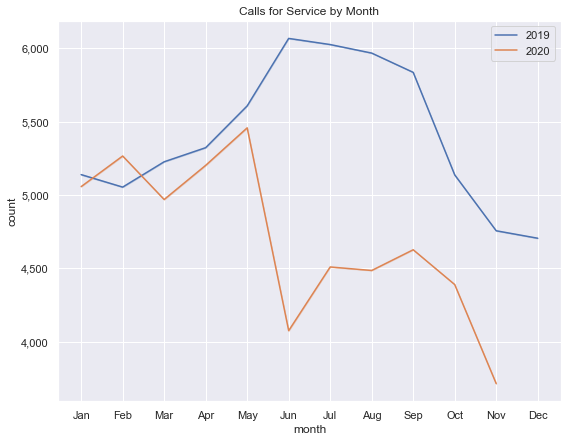

In [72]:
# Some boilerplate to initialize things
sns.set()
plt.figure()

figure(num=None, figsize=(9,7))


#Define plots
d2019 = sns.lineplot(data=df19_, x="month", y="count", label = "2019",).set_title('Calls for Service by Month')
d2020  = sns.lineplot(data=df20_, x="month", y="count", label = "2020",)

# add commas to y axis
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

## Now let's review calls for service involving Fireworks 

In [73]:
df19_1 = df19[(df19.Call_Type_Text >= '2019-01-01') & (df19.Dispatch_Date < '2020-01-01') & (df19.Call_Type_Text == 'FIREWORKS')]
df20_1 = df20[(df20.Dispatch_Date >= '2020-01-01') & (df20.Dispatch_Date <= '2020-11-30')& (df20.Call_Type_Text == 'FIREWORKS')]
# Preview the 2020 data, top five rows by default
df20_1.tail()

# First copy slice as a dataframe
df20_f= df20_1.copy()
df19_f= df19_1.copy()
# Then do a count
df20_f['month'] = df20_f['Dispatch_Date'].dt.strftime('%b')
df19_f['month'] = df19_f['Dispatch_Date'].dt.strftime('%b')

df20_f['count']=df20_f.groupby(by='Dispatch_Date')['Dispatch_Date'].transform('count')
df19_f['count']=df19_f.groupby(by='Dispatch_Date')['Dispatch_Date'].transform('count')
df19_f['month'] = pd.Categorical(df19_f['month'], categories=months, ordered=True)
df20_f['month'] = pd.Categorical(df20_f['month'], categories=months, ordered=True)
# Preview 2019
df19_f.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,month,count
0,LPD190704000047,N Hollywood,1532.0,2019-07-04,00:14:49,507F,FIREWORKS,Jul,995
148,LPD190704006535,Topanga,2162.0,2019-07-04,20:53:21,507F,FIREWORKS,Jul,995
931,LPD190524004758,Hollenbeck,499.0,2019-05-24,18:45:53,507F,FIREWORKS,May,13
1010,PD19122400004649,Olympic,2049.0,2019-12-24,23:37:01,507F,FIREWORKS,Dec,71
1482,LPD190604000145,Topanga,2114.0,2019-06-04,00:46:58,507F,FIREWORKS,Jun,11


<Figure size 432x288 with 0 Axes>

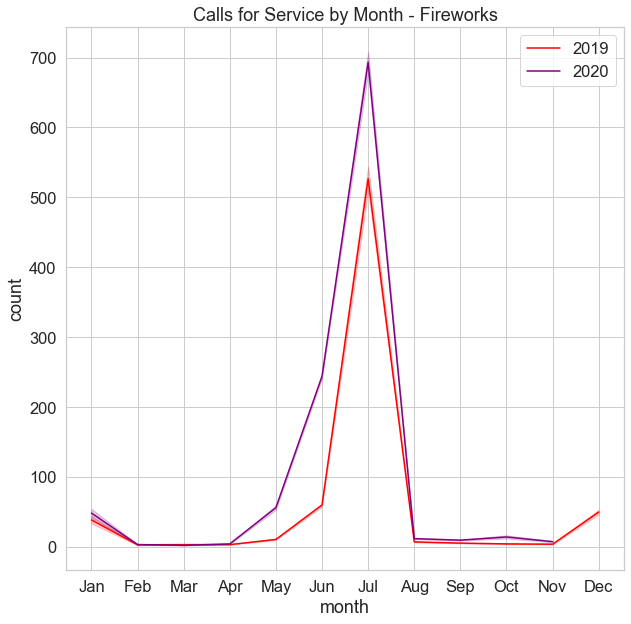

In [74]:
# Some boilerplate to initialize things
sns.set()
plt.figure()

figure(num=None, figsize=(10,10))
sns.set(context='notebook', style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)

# add commas to y axis
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
pal = sns.dark_palette('purple',2)
#Define plots
sns.lineplot(data=df19_f, x="month", y="count", label = "2019", color="red").set_title('Calls for Service by Month - Fireworks')

sns.lineplot(data=df20_f, x="month", y="count", label = "2020", color="purple")
plt.show()

## Let's look at disputes
### this review includes roomate, family, and neighbor disputes

In [75]:
df19_1 = df19[(df19.Call_Type_Text >= '2019-01-01') & (df19.Dispatch_Date < '2020-01-01') 
              & (df19.Call_Type_Code.str.contains('620'))]
df20_1 = df20[(df20.Dispatch_Date >= '2020-01-01') & (df20.Dispatch_Date <= '2020-11-30') 
              & (df20.Call_Type_Code.str.contains('620'))]
# Preview the 2020 data, top five rows by default
df20_1.tail()

# First copy slice as a dataframe
df20_d = df20_1.copy()
df19_d = df19_1.copy()
# Then do a count
df20_d['month'] = df20_d['Dispatch_Date'].dt.strftime('%b')
df19_d['month'] = df19_d['Dispatch_Date'].dt.strftime('%b')



df19_d['month'] = pd.Categorical(df19_d['month'], categories=months, ordered=True)
df20_d['month'] = pd.Categorical(df20_d['month'], categories=months, ordered=True)
df20_d['count']=df20_d.groupby(by='month')['month'].transform('count')
df19_d['count']=df19_d.groupby(by='month')['month'].transform('count')
# Preview 2019
df19_d.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,month,count
16,LPD190613005657,West Valley,1021.0,2019-06-13,19:23:25,620F,FAMILY,Jun,7417
39,PD19112300001384,Rampart,218.0,2019-11-23,09:18:51,620L,LANDLORD/TENANT,Nov,6493
46,LPD190914006539,Harbor,566.0,2019-09-15,01:09:00,620M,MAN/WMN,Sep,7300
105,LPD190610006685,Rampart,236.0,2019-06-11,00:11:48,620D,DOM VIOL,Jun,7417
121,LPD190601003978,Northeast,1109.0,2019-06-01,17:22:03,620N,NEIGHBOR,Jun,7417


<Figure size 432x288 with 0 Axes>

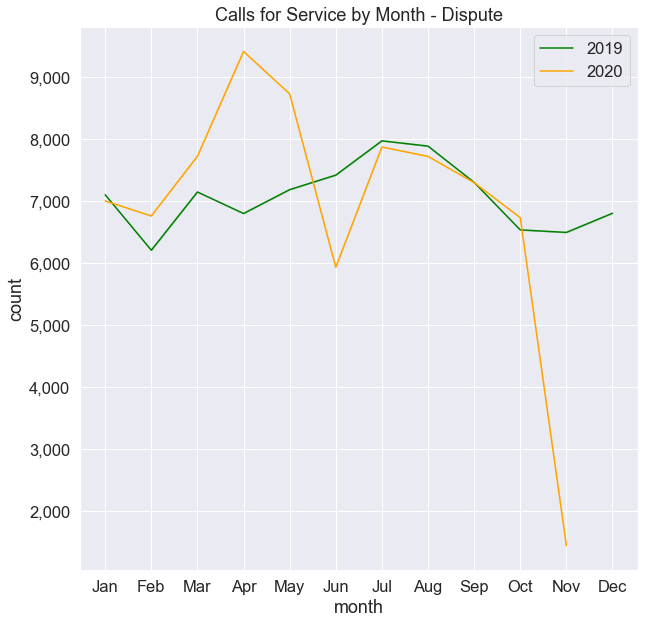

In [76]:
# Some boilerplate to initialize things
sns.set()
plt.figure()

figure(num=None, figsize=(10,10))
sns.set(context='notebook',  font='sans-serif', font_scale=1.5, color_codes=False, rc=None)

# add commas to y axis
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
pal = sns.dark_palette('purple',2)
#Define plots
sns.lineplot(data=df19_d, x="month", y="count", label = "2019", color="green").set_title('Calls for Service by Month - Dispute')

sns.lineplot(data=df20_d, x="month", y="count", label = "2020", color="orange")
plt.show()